## Find the simplest neural networks! 


Use diﬀerent activations, number of layers, number of neurons at each layer, compare their performance and ﬁnd the simplest neural net. There could be couple of networks that are fairly close in terms of the performance choose anyone you think has the least complexity and explain your reasoning.




### Expectation Part 1 

#### 1. Use diﬀerent activations. 
#### 2. Number of layers, Number of neurons at each layer, compare their performance and ﬁnd the simplest neural net.
#### 3. There could be couple of networks that are fairly close in terms of the performance choose anyone you think has the least complexity and explain your reasoning 



### Expectation Part 2


#### 4. Create new atributes and use them instead to train the neural network
${X_3} = {X_1^{2}}$

${X_4} = {X_2^{2}}$

${X_5} = {X_1}{X_2}$
#### 5. Find the simplest neural network for hte following set of inputs 

1.{${X_3},{X_4}$}


2.{${X_3},{X_5}$}

3.{${X_3},{X_4},{X_5}$}


4.{${X_1},{X_2},{X_3},{X_4},{X_5}$}





#### 6. remember to validate your model and avoid overfitting









----------------------------------------------------------------------------------------------------------




### Project Goal and Assumptions  : 

The goal of this project is to come up with simple Neural Nets that can help classify data sets based on different Inputs. As Inputs, we are going to use the training data set provided and we are going to assume this set is a good reflection of the true data.   

Following those lines, we are going to use built-in methods to avoid overfitting and we are going to assume the training data is representative enough of the true distribution. We will validate the training using a testing set that is also a good representation of such true distribution. 



### Project Methology  : 


#### For this project, I am going to use the  MLP ( Multi-layer Perceptron) Classifier provided in SciKit Learn.
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html 

This model optimizes the log-loss function using LBFGS or stochastic gradient descent.

#### For each individual input set we will complete the following steps :


1. Adjust the main DataSet according to the features that are needed as input. 
2. Create a plot with the data to get an visual understanding of the different inputs  
3. Shuffle the data prior to applying the MLP model 
4. Split the data - Making sure the training set and testing set are a good representation of the true data  
5. Normalize the data 
6. Loop through different Activations and Number of Layers and Neurons per layer
7. Select the top performers
8. Run the classifier for those top performers and choose the simplest Neural Network 
9. Ensure our model is not overfitted by applying methods like early stopping or regularization parameters




In [2]:
import pandas as pd

color_data=pd.read_csv(r"C:\Users\User\OneDrive\FoundationsML\FinalProject\train_set.txt",delimiter=',', header=None)# home


#color_data=pd.read_csv(r"C:\Users\scabellos\OneDrive - Urban Science\User Documents\MastersDegree\ML\Final\train_set.txt", 
 #                     delimiter=',', header=None)# import from home 

color_data.columns=['X1','X2','Color']

In [3]:
color_data.head()

,X1,X2,Color
0,16.263398,13.299206,r
1,0.775408,23.986692,r
2,29.170503,-3.287474,r
3,6.739044,-28.033329,r
4,3.216100,22.013695,r


In [4]:
color_data.describe()

,X1,X2
count,685.000000,685.000000
mean,0.596296,1.079071
std,18.941957,18.789436
min,-54.531886,-57.232861
25%,-16.376391,-14.788019
50%,0.387794,0.474620
75%,17.255583,16.628887
max,58.905065,60.321524


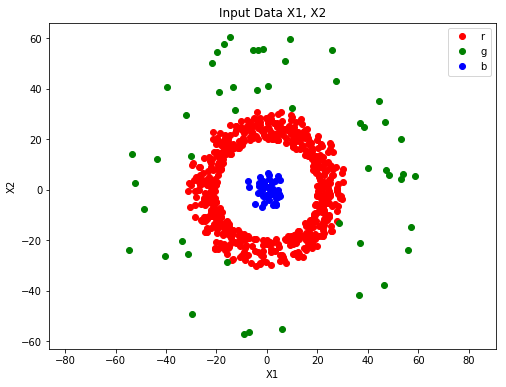

In [7]:
# Visualize the input data sets
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
#plt.subplot(1, 2, 1)
red=color_data[color_data['Color'].str.contains('r')]
green=color_data[color_data['Color'].str.contains('g')]
blue=color_data[color_data['Color'].str.contains('b')]
plt.plot(red["X1"], red["X2"],'r', linestyle='none', marker='o', label='r')
plt.plot(green["X1"], green["X2"],'g', linestyle='none', marker='o', label='g')
plt.plot(blue["X1"], blue["X2"],'b', linestyle='none', marker='o', label='b')
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.legend()
plt.title("Input Data X1, X2")
plt.show()
#plt.plot(x0, y0, "r.", markersize=10)


In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss #log_loss(y_true, y_pred)
from sklearn.metrics import confusion_matrix

In [6]:
color_data['Color'].value_counts()

r    585
g     50
b     50
Name: Color, dtype: int64

With such an unbalanced set, we want to make sure both our training and our testing set are representative of the classes. In order to do that, we are going to use a custom code to ensure enough representation is made according to true data distribution


we are gonig to build a training/testing set of 80%/20% where the 3 colors have enough representation in each set. 

( Around - 85.4% reds / 7.3% green / 7.3% blue )  

In [7]:
red=color_data[color_data['Color']=='r']
green=color_data[color_data['Color']=='g']
blue=color_data[color_data['Color']=='b']            

Always shuffle the data before setting it up for training and testing. 

In [8]:
from sklearn.utils import shuffle
red = shuffle(red,random_state=0)
green = shuffle(green,random_state=0)
blue = shuffle(blue,random_state=0)

In [9]:
#red.shape --- 585
red_train=red.head(468) # 80% 
red_test=red.tail(117)  #20% 

In [10]:
#green.shape --- 50
green_train=green.head(40) # 80% 
green_test=green.tail(10)  #20% 

In [11]:
#blue.shape --- 50
blue_train=blue.head(40) # 80% 
blue_test=blue.tail(10)  #20% 

In [12]:
train_frames=[red_train,green_train,blue_train]
test_frames=[red_test,green_test,blue_test]

train=pd.concat(train_frames)
test=pd.concat(test_frames)

x_train=train.drop(['Color'], axis=1)
x_test=test.drop(['Color'], axis=1)

y_train = train['Color']
y_test = test['Color']


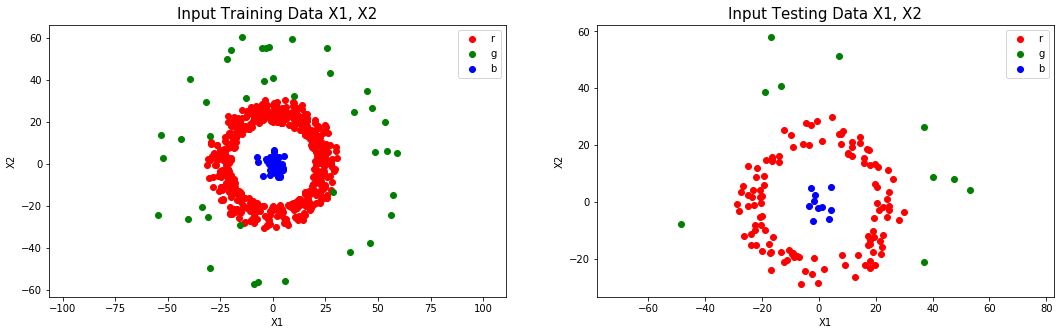

In [14]:
# Visualize the input data sets
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 5))

plt.subplot(121)
plt.plot(red_train['X1'], red_train['X2'],'r', linestyle='none', marker='o', label='r')
plt.plot(green_train["X1"], green_train["X2"],'g', linestyle='none', marker='o', label='g')
plt.plot(blue_train["X1"], blue_train["X2"],'b', linestyle='none', marker='o', label='b')
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')

plt.legend()
plt.title("Input Training Data X1, X2",size=15)

#plt.plot(x0, y0, "r.", markersize=10)

plt.subplot(122)

#red_l=color_data[color_data['Color'].str.contains('r')]
#green_=color_data[color_data['Color'].str.contains('g')]
#blue=color_data[color_data['Color'].str.contains('b')]

plt.plot(red_test['X1'], red_test['X2'],'r', linestyle='none', marker='o', label='r')
plt.plot(green_test["X1"], green_test["X2"],'g', linestyle='none', marker='o', label='g')
plt.plot(blue_test["X1"], blue_test["X2"],'b', linestyle='none', marker='o', label='b')
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.legend()
plt.title("Input Testing Data X1, X2", size=15)
plt.show()

#plt.plot(x0, y0, "r.", markersize=10)



So we have similarly distributed data for training and for testing. 

#### Scaling the training and test data sets. 



Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set. 
This is because the test set plays the role of fresh unseen data, so it's not supposed to be accessible at the training stage. Using any information coming from the test set before or during training is a potential bias in the evaluation of the performance.



In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


In [18]:
import itertools 
# Define layers and Neurons per layer - 
layers=[2,4,5,6,7,8,9,10]
neurons=[2,3,4,5,6]
hidden_layer_sizes=list(itertools.product(layers,neurons))
#diff activation
models=('identity', 'logistic', 'tanh', 'relu')
    
acc=[]
layer=[]
activation=[]
for h in hidden_layer_sizes:
    for a in models:
        clf = MLPClassifier(hidden_layer_sizes=h,activation=a ,max_iter=200, alpha=0.01,
                            learning_rate='constant',solver='lbfgs', random_state=21,tol=0.000000001)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        acc.append(accuracy_score(y_test, y_pred))
        #loss_log.append(log_loss(y_test, y_pred))
        layer.append(h)
        activation.append(a)


In [23]:
d={'Acuracy':acc,'Layers and Neurons per Layer':layer, 'Activation':activation}
history=pd.DataFrame(d)
history.sort_values('Acuracy',ascending=False).head()

,Acuracy,Layers and Neurons per Layer,Activation
155,1.0,"(10, 5)",relu
22,1.0,"(4, 2)",tanh
55,1.0,"(5, 5)",relu
21,1.0,"(4, 2)",logistic
67,1.0,"(6, 3)",relu


In [24]:
acc=[]
train=[]
test=[]
iter_log=[]
for i in range(1,500,1):
    clf = MLPClassifier(hidden_layer_sizes=(4, 2), activation='tanh',max_iter=i, alpha=0.1,
                        learning_rate='constant',solver='lbfgs', random_state=10,tol=0.000000001)
    x_train,y_train = shuffle(x_train,y_train,random_state=0)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred))
    train.append(clf.score(x_train, y_train))
    test.append(clf.score(x_test, y_test))
    iter_log.append(i)

    
acc_1=[]
train_1=[]
test_1=[]

for i in range(1,500,1):
    clf = MLPClassifier(hidden_layer_sizes=(4, 2), activation='logistic',max_iter=i, alpha=0.1,
                        learning_rate='constant',solver='lbfgs', random_state=10,tol=0.000000001)
    x_train,y_train = shuffle(x_train,y_train,random_state=0)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc_1.append(accuracy_score(y_test, y_pred))
    train_1.append(clf.score(x_train, y_train))
    test_1.append(clf.score(x_test, y_test))
   

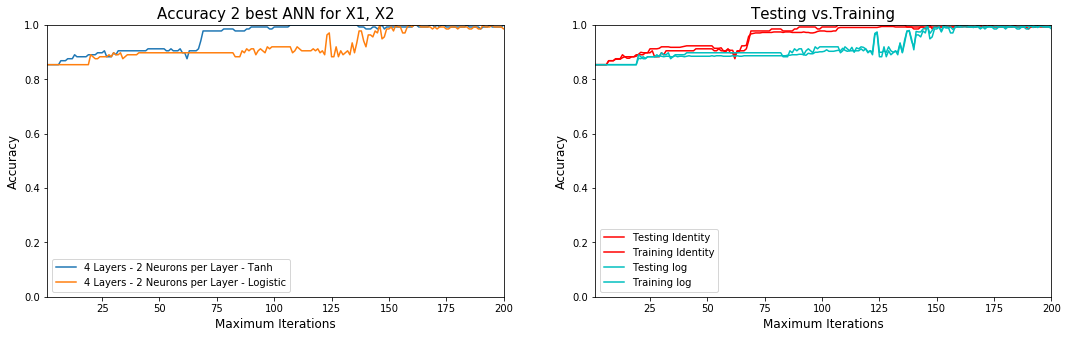

In [26]:
plt.figure(figsize=(18, 5))


plt.subplot(121)
#plt.figure(figsize=(8,6))
plt.plot(iter_log, acc,label='4 Layers - 2 Neurons per Layer - Tanh ')
plt.plot(iter_log, acc_1,label='4 Layers - 2 Neurons per Layer - Logistic')
plt.xlabel("Maximum Iterations", size=12,)
#plt.xticks(iter_opt,rotation=45)
plt.ylim(0,1)
plt.xlim(1,200)
plt.ylabel("Accuracy", size=12)
plt.legend()
plt.title("Accuracy 2 best ANN for X1, X2" , size=15);


plt.subplot(122)
#plt.figure(figsize=(8,6))
plt.plot(iter_log, test,label='Testing Identity',c='r')
plt.plot(iter_log, train,label='Training Identity',c='r')

plt.plot(iter_log, test_1,label='Testing log',c='c')
plt.plot(iter_log, train_1,label='Training log',c='c')

plt.xlabel("Maximum Iterations", size=12,)
#plt.xticks(iter_opt,rotation=45)
plt.ylim(0,1)
plt.xlim(1,200)
plt.ylabel("Accuracy", size=12)
plt.legend()
plt.title("Testing vs.Training" , size=15);

As we can see above, both networks are showing similar accuracy between having more of less layers. Also, the validation between the training and the testing seems to be working .There is not difference in accuracy when we apply the model to the testing portion. 


Therefore, the simplest ANN we can choose is the one with 4 Layers and 2 Neurons each - Logistic "
 

#### clf = MLPClassifier(hidden_layer_sizes=(4, 2), activation='logistic',max_iter=200, alpha=0.1, learning_rate='constant',solver='lbfgs', random_state=10,tol=0.000000001)





------------------------------------------------------------------------------------------------------------------------------





## Build new attributes


In this section you will create new attributes and you are going to use them instead to train the neural network. If we call the ﬁrst attributes X1 and the second attributes X2, then the other 3 are as follows : 


${X_3} = {X_1^{2}}$

${X_4} = {X_2^{2}}$

${X_5} = {X_1}{X_2}$


In [27]:
color_data.head()

,X1,X2,Color
0,16.263398,13.299206,r
1,0.775408,23.986692,r
2,29.170503,-3.287474,r
3,6.739044,-28.033329,r
4,3.216100,22.013695,r


We are also going to add them to the main data frame so we can visualize the new data with the corresponding labels. 

In [28]:

color_data['X3']=color_data['X1']**2
color_data['X4']=color_data['X2']**2
color_data['X5']=color_data['X1']*color_data['X2']
color_data = color_data[['X1', 'X2', 'X3', 'X4','X5','Color']]
print(color_data.head())


          X1         X2          X3          X4          X5 Color
0  16.263398  13.299206  264.498124  176.868878  216.290282     r
1   0.775408  23.986692    0.601257  575.361405   18.599466     r
2  29.170503  -3.287474  850.918251   10.807487  -95.897279     r
3   6.739044 -28.033329   45.414707  785.867535 -188.917824     r
4   3.216100  22.013695   10.343297  484.602776   70.798239     r


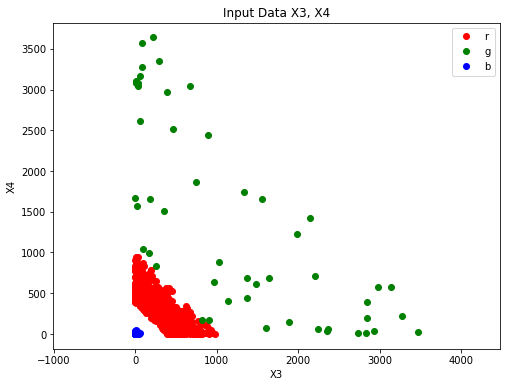

In [29]:
# Visualize the input data sets
            

plt.figure(figsize=(8, 6))
red=color_data[color_data['Color'].str.contains('r')]
green=color_data[color_data['Color'].str.contains('g')]
blue=color_data[color_data['Color'].str.contains('b')]
plt.plot(red["X3"], red["X4"],'r', linestyle='none', marker='o', label='r')
plt.plot(green["X3"], green["X4"],'g', linestyle='none', marker='o', label='g')
plt.plot(blue["X3"], blue["X4"],'b', linestyle='none', marker='o', label='b')
plt.xlabel("X3")
plt.ylabel("X4")
plt.axis('equal')
plt.legend()
plt.title("Input Data X3, X4");

In [30]:
      

#Always shuffle the data before setting it up for training and testing. 

red = shuffle(red,random_state=0)
green = shuffle(green,random_state=0)
blue = shuffle(blue,random_state=0)

#red.shape --- 585
red_train=red.head(468) # 80% 
red_test=red.tail(117)  #20% 

#green.shape --- 50
green_train=green.head(40) # 80% 
green_test=green.tail(10)  #20% 

#blue.shape --- 50
blue_train=blue.head(40) # 80% 
blue_test=blue.tail(10)  #20% 

train_frames=[red_train,green_train,blue_train]
test_frames=[red_test,green_test,blue_test]

train=pd.concat(train_frames)
test=pd.concat(test_frames)



In [32]:
train['Color'].value_counts()

r    468
g     40
b     40
Name: Color, dtype: int64

In [33]:
test['Color'].value_counts()

r    117
g     10
b     10
Name: Color, dtype: int64



## 5. Find the simplest neural network for hte following set of inputs 


1.{${X_3},{X_4}$}


2.{${X_3},{X_5}$}

3.{${X_3},{X_4},{X_5}$}


4.{${X_1},{X_2},{X_3},{X_4},{X_5}$}


Lets start with number 1 


In [34]:

x34_train=train.drop(['Color','X1','X2','X5'], axis=1)
x34_test=test.drop(['Color','X1','X2','X5'], axis=1)

y_train = train['Color']
y_test = test['Color']

Text(0.5, 1.0, 'Input Testing Data X3, X4')

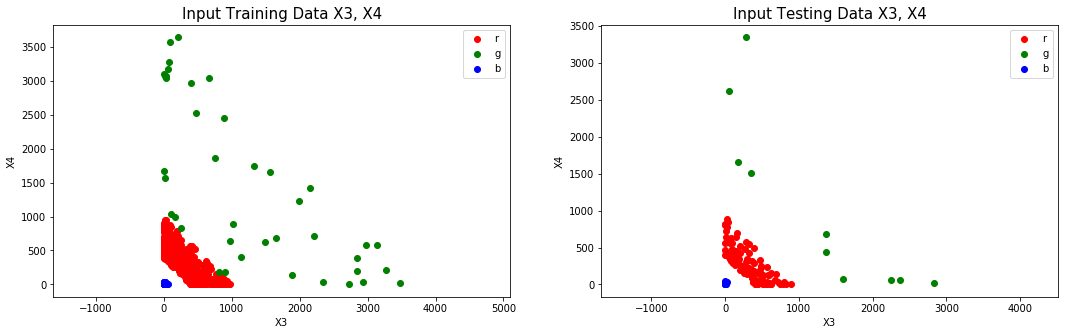

In [56]:
# Visualize the input data sets
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 5))

plt.subplot(121)
plt.plot(red_train['X3'], red_train['X4'],'r', linestyle='none', marker='o', label='r')
plt.plot(green_train["X3"], green_train["X4"],'g', linestyle='none', marker='o', label='g')
plt.plot(blue_train["X3"], blue_train["X4"],'b', linestyle='none', marker='o', label='b')
plt.xlabel("X3")
plt.ylabel("X4")
plt.axis('equal')

plt.legend()
plt.title("Input Training Data X3, X4",size=15)


plt.subplot(122)
plt.plot(red_test['X3'], red_test['X4'],'r', linestyle='none', marker='o', label='r')
plt.plot(green_test["X3"], green_test["X4"],'g', linestyle='none', marker='o', label='g')
plt.plot(blue_test["X3"], blue_test["X4"],'b', linestyle='none', marker='o', label='b')
plt.xlabel("X3")
plt.ylabel("X4")
plt.axis('equal')
plt.legend()
plt.title("Input Testing Data X3, X4", size=15)


Again, we have set our input data to have a good representation of each color. This will give us a good validation set for the Neural Net 

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x34_train=scaler.fit_transform(x34_train)
x34_test=scaler.fit_transform(x34_test)


In [37]:
import itertools 
# Define layers and Neurons per layer - 
layers=[2,4,5,6,7,8,9,10]
neurons=[2,3,4,5,6]
hidden_layer_sizes=list(itertools.product(layers,neurons))
#diff activation
models=('identity', 'logistic', 'tanh', 'relu')
    
acc=[]
layer=[]
activation=[]
for h in hidden_layer_sizes:
    for a in models:
        clf = MLPClassifier(hidden_layer_sizes=h,activation=a ,max_iter=200, alpha=0.01,
                            learning_rate='constant',solver='lbfgs', random_state=21,tol=0.000000001)
        clf.fit(x34_train, y_train)
        y_pred = clf.predict(x34_test)
        acc.append(accuracy_score(y_test, y_pred))
        layer.append(h)
        activation.append(a)


In [40]:
d={'Acuracy':acc,'Layers and Neurons per Layer':layer, 'Activation':activation}
history=pd.DataFrame(d)
history.sort_values('Acuracy',ascending=False).head()

,Acuracy,Layers and Neurons per Layer,Activation
159,1.0,"(10, 6)",relu
91,1.0,"(7, 4)",relu
121,1.0,"(9, 2)",logistic
59,1.0,"(5, 6)",relu
58,1.0,"(5, 6)",tanh


In [41]:
acc=[]
train=[]
test=[]
iter_log=[]
for i in range(1,500,1):
    clf = MLPClassifier(hidden_layer_sizes=(2, 2), activation='identity',max_iter=i, alpha=0.01,
                        learning_rate='constant',solver='lbfgs', random_state=10,tol=0.000000001,early_stopping=True)
    x34_train,y_train = shuffle(x34_train,y_train,random_state=0)
    clf.fit(x34_train, y_train)
    y_pred = clf.predict(x34_test)
    acc.append(accuracy_score(y_test, y_pred))
    train.append(clf.score(x34_train, y_train))
    test.append(clf.score(x34_test, y_test))
    iter_log.append(i)
    
acc_1=[]
train_1=[]
test_1=[]


for i in range(1,500,1):
    clf = MLPClassifier(hidden_layer_sizes=(2, 2), activation='logistic',max_iter=i, alpha=0.01,
                        learning_rate='constant',solver='lbfgs', random_state=10,tol=0.000000001,early_stopping=True)
    x34_train,y_train = shuffle(x34_train,y_train,random_state=0)
    clf.fit(x34_train, y_train)
    y_pred = clf.predict(x34_test)
    acc_1.append(accuracy_score(y_test, y_pred))
    train_1.append(clf.score(x34_train, y_train))
    test_1.append(clf.score(x34_test, y_test))
    

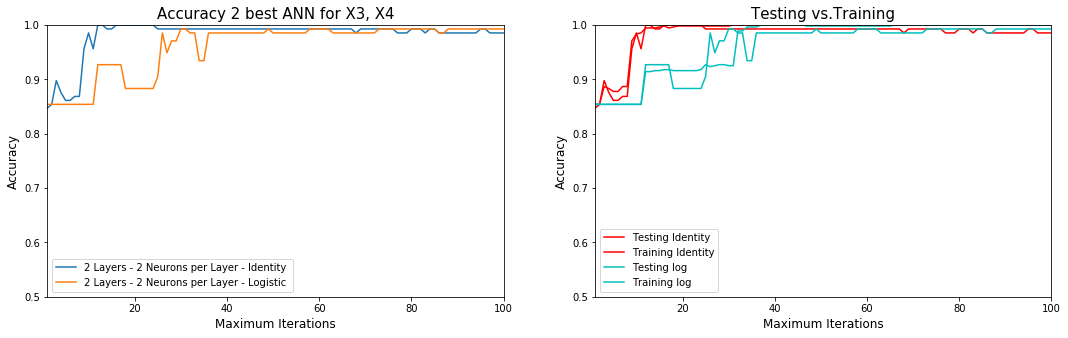

In [44]:
plt.figure(figsize=(18, 5))


plt.subplot(121)
#plt.figure(figsize=(8,6))
plt.plot(iter_log, acc,label='2 Layers - 2 Neurons per Layer - Identity ')
plt.plot(iter_log, acc_1,label='2 Layers - 2 Neurons per Layer - Logistic')
plt.xlabel("Maximum Iterations", size=12,)
plt.ylim(0.5,1)
plt.xlim(1,100)
plt.ylabel("Accuracy", size=12)
plt.legend()
plt.title("Accuracy 2 best ANN for X3, X4" , size=15);


plt.subplot(122)
#plt.figure(figsize=(8,6))
plt.plot(iter_log, test,label='Testing Identity',c='r')
plt.plot(iter_log, train,label='Training Identity',c='r')

plt.plot(iter_log, test_1,label='Testing log',c='c')
plt.plot(iter_log, train_1,label='Training log',c='c')

plt.xlabel("Maximum Iterations", size=12,)
#plt.xticks(iter_opt,rotation=45)
plt.ylim(0.5,1)
plt.xlim(1,100)
plt.ylabel("Accuracy", size=12)
plt.legend()
plt.title("Testing vs.Training" , size=15);


The simplest ANN we can choose is the one with 2 Layers and 2 Neurons each - Using the easiest Activation = "Identity" 




### clf = MLPClassifier(hidden_layer_sizes=(2, 2), activation='identity',max_iter=i, alpha=0.01, learning_rate='constant',solver='lbfgs', random_state=10,tol=0.000000001,early_stopping=True)


### Next set of Inputs will be : 

2.{${X_3},{X_5}$}

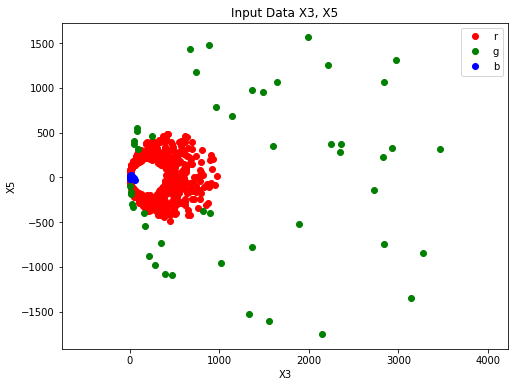

In [78]:
# Visualize the input data sets

plt.figure(figsize=(8, 6))
#plt.subplot(1, 2, 1)
red=color_data[color_data['Color'].str.contains('r')]
green=color_data[color_data['Color'].str.contains('g')]
blue=color_data[color_data['Color'].str.contains('b')]
plt.plot(red["X3"], red["X5"],'r', linestyle='none', marker='o', label='r')
plt.plot(green["X3"], green["X5"],'g', linestyle='none', marker='o', label='g')
plt.plot(blue["X3"], blue["X5"],'b', linestyle='none', marker='o', label='b')
plt.xlabel("X3")
plt.ylabel("X5")
plt.axis('equal')
plt.legend()
plt.title("Input Data X3, X5");

In [48]:

train=pd.concat(train_frames)
test=pd.concat(test_frames)


x35_train=train.drop(['Color','X1','X2','X4'], axis=1)
x35_test=test.drop(['Color','X1','X2','X4'], axis=1)

y_train = train['Color']
y_test = test['Color']



Text(0.5, 1.0, 'Input Testing Data X3, X5')

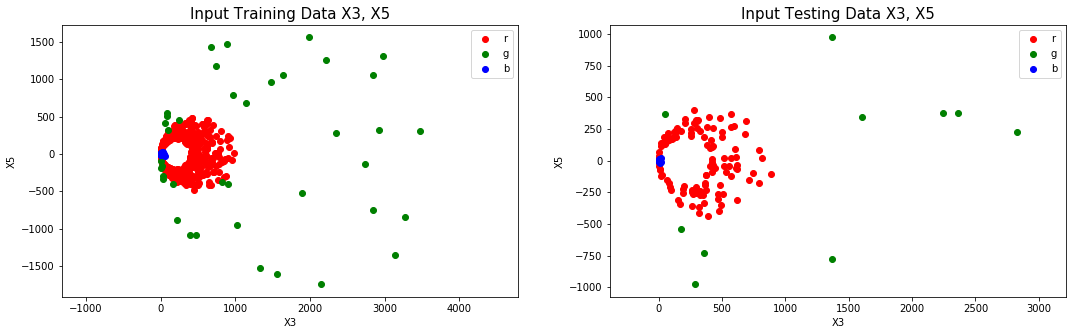

In [57]:
# Visualize the input data sets for training and testing
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 5))

plt.subplot(121)
plt.plot(red_train['X3'], red_train['X5'],'r', linestyle='none', marker='o', label='r')
plt.plot(green_train["X3"], green_train["X5"],'g', linestyle='none', marker='o', label='g')
plt.plot(blue_train["X3"], blue_train["X5"],'b', linestyle='none', marker='o', label='b')
plt.xlim(-1000,3500)
plt.xlabel("X3")
plt.ylabel("X5")
plt.axis('equal')

plt.legend()
plt.title("Input Training Data X3, X5",size=15)


plt.subplot(122)
plt.plot(red_test['X3'], red_test['X5'],'r', linestyle='none', marker='o', label='r')
plt.plot(green_test["X3"], green_test["X5"],'g', linestyle='none', marker='o', label='g')
plt.plot(blue_test["X3"], blue_test["X5"],'b', linestyle='none', marker='o', label='b')
plt.xlabel("X3")
plt.xlim(-1000,3500)
plt.ylabel("X5")
plt.axis('equal')
plt.legend()
plt.title("Input Testing Data X3, X5", size=15)

Now we are going to train our Neural Network using X3 and X5 as input 

In [230]:
#x35 , y = shuffle(x35,y,random_state=0)
#x35_train, x35_test, y_train, y_test = train_test_split(x35, y, test_size= 0.2, random_state=27)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x35_train=scaler.fit_transform(x35_train)
x35_test=scaler.fit_transform(x35_test)

In [59]:

# Define layers and Neurons per layer - 
layers=[2,4,5,6,7,8,9,10]
neurons=[2,3,4,5,6]
hidden_layer_sizes=list(itertools.product(layers,neurons))
#diff activation
models=('identity', 'logistic', 'tanh', 'relu')
    
acc=[]
layer=[]
activation=[]
for h in hidden_layer_sizes:
    for a in models:
        clf = MLPClassifier(hidden_layer_sizes=h,activation=a ,max_iter=200, alpha=0.01,
                            learning_rate='constant',solver='lbfgs', random_state=21,tol=0.000000001)
        clf.fit(x35_train, y_train)
        y_pred = clf.predict(x35_test)
        acc.append(accuracy_score(y_test, y_pred))
        #loss_log.append(log_loss(y_test, y_pred))
        layer.append(h)
        activation.append(a)


In [62]:
d={'Acuracy':acc,'Layers and Neurons per Layer':layer, 'Activation':activation}
history=pd.DataFrame(d)
history.sort_values('Acuracy',ascending=False).head()

,Acuracy,Layers and Neurons per Layer,Activation
65,0.963504,"(6, 3)",logistic
21,0.956204,"(4, 2)",logistic
17,0.948905,"(2, 6)",logistic
37,0.941606,"(4, 6)",logistic
42,0.941606,"(5, 2)",tanh


In [63]:
acc=[]
train=[]
test=[]
iter_log=[]
for i in range(1,500,1):
    clf = MLPClassifier(hidden_layer_sizes=(6, 3), activation='logistic',max_iter=i, alpha=0.01,
                        learning_rate='constant',solver='lbfgs', random_state=10,tol=0.000000001,early_stopping=True)
    x35_train,y_train = shuffle(x35_train,y_train,random_state=0)
    clf.fit(x35_train, y_train)
    y_pred = clf.predict(x35_test)
    acc.append(accuracy_score(y_test, y_pred))
    train.append(clf.score(x35_train, y_train))
    test.append(clf.score(x35_test, y_test))
    iter_log.append(i)
    
acc_1=[]
train_1=[]
test_1=[]


for i in range(1,500,1):
    clf = MLPClassifier(hidden_layer_sizes=(4, 2), activation='logistic',max_iter=i, alpha=0.01,
                        learning_rate='constant',solver='lbfgs', random_state=10,tol=0.000000001,early_stopping=True)
    x35_train,y_train = shuffle(x35_train,y_train,random_state=0)
    clf.fit(x35_train, y_train)
    y_pred = clf.predict(x35_test)
    acc_1.append(accuracy_score(y_test, y_pred))
    train_1.append(clf.score(x35_train, y_train))
    test_1.append(clf.score(x35_test, y_test))
  

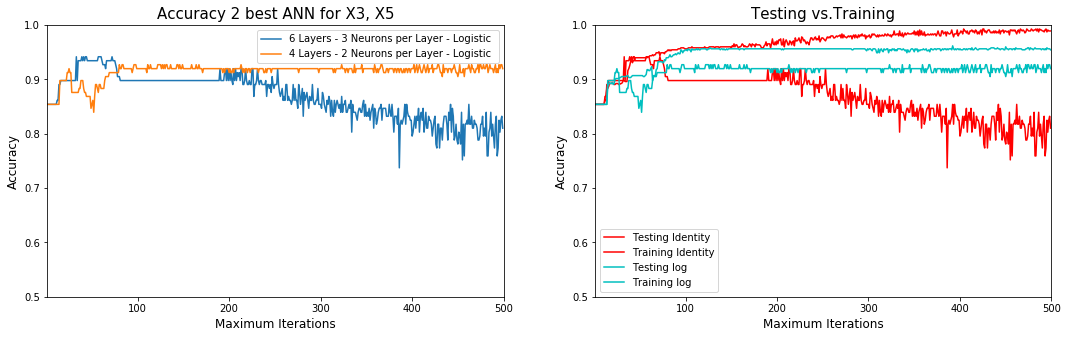

In [65]:
plt.figure(figsize=(18, 5))


plt.subplot(121)
#plt.figure(figsize=(8,6))
plt.plot(iter_log, acc,label='6 Layers - 3 Neurons per Layer - Logistic ')
plt.plot(iter_log, acc_1,label='4 Layers - 2 Neurons per Layer - Logistic')
plt.xlabel("Maximum Iterations", size=12,)
plt.ylim(0.5,1)
plt.xlim(1,500)
plt.ylabel("Accuracy", size=12)
plt.legend()
plt.title("Accuracy 2 best ANN for X3, X5" , size=15);


plt.subplot(122)
#plt.figure(figsize=(8,6))
plt.plot(iter_log, test,label='Testing Identity',c='r')
plt.plot(iter_log, train,label='Training Identity',c='r')

plt.plot(iter_log, test_1,label='Testing log',c='c')
plt.plot(iter_log, train_1,label='Training log',c='c')

plt.xlabel("Maximum Iterations", size=12,)
#plt.xticks(iter_opt,rotation=45)
plt.ylim(0.5,1)
plt.xlim(1,500)
plt.ylabel("Accuracy", size=12)
plt.legend()
plt.title("Testing vs.Training" , size=15);

The simplest ANN we can choose is the one with 4 Layers and 2 Neurons each - Using the easiest Activation = "Logistic" 


#### clf = MLPClassifier(hidden_layer_sizes=(4, 2), activation='logistic',max_iter=500, alpha=0.01, learning_rate='constant',solver='lbfgs', random_state=10,tol=0.000000001,early_stopping=True)


### Next , we will use 3 inputs like :

3. {${X_3},{X_4},{X_5}$}

### Lets visualize the Inputs 

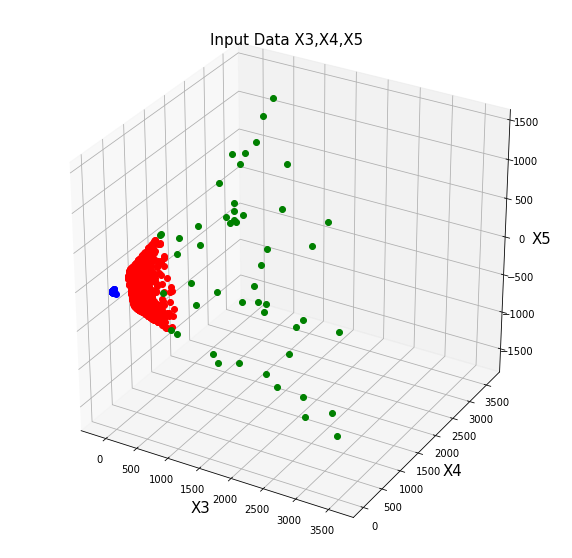

In [103]:

from mpl_toolkits import mplot3d 
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
# Visualize the input data sets


#plt.subplot(1, 2, 1)
red=color_data[color_data['Color'].str.contains('r')]
green=color_data[color_data['Color'].str.contains('g')]
blue=color_data[color_data['Color'].str.contains('b')]
ax.plot3D(red["X3"], red["X4"], red["X5"],'r', linestyle='none', marker='o', label='r')
ax.plot3D(green["X3"],green["X4"], green["X5"],'g', linestyle='none', marker='o', label='g')
ax.plot3D(blue["X3"],blue["X4"], blue["X5"],'b', linestyle='none', marker='o', label='b')

ax.set_xlabel('X3', fontsize=15)
ax.set_ylabel('X4', fontsize=15)
ax.set_zlabel('X5', fontsize=15);
plt.axis('equal')
#plt.legend()
plt.title("Input Data X3,X4,X5",fontsize=15);

In [66]:

train=pd.concat(train_frames)
test=pd.concat(test_frames)


x345_train=train.drop(['Color','X1','X2'], axis=1)
x345_test=test.drop(['Color','X1','X2'], axis=1)

y_train = train['Color']
y_test = test['Color']


In [70]:
x345_test.head()

,X3,X4,X5
90,276.880101,572.940122,398.290997
524,104.349722,289.885734,173.923822
214,371.394797,150.057626,-236.073339
431,377.678129,33.517038,-112.510676
637,429.591044,28.631296,110.904231


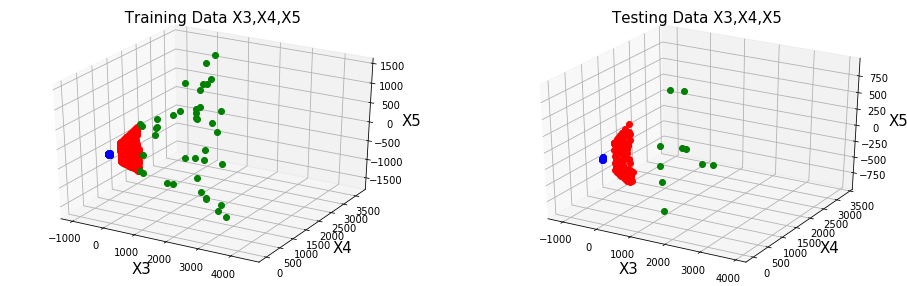

In [82]:

from mpl_toolkits import mplot3d 
fig = plt.figure(figsize=(16,5))
#ax = plt.axes(projection='3d')
# Visualize the input data sets


ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot3D(red_train['X3'],red_train['X4'], red_train['X5'],'r', linestyle='none', marker='o', label='r')
ax.plot3D(green_train["X3"], green_train["X4"],green_train["X5"],'g', linestyle='none', marker='o', label='g')
ax.plot3D(blue_train["X3"], blue_train["X4"], blue_train["X5"],'b', linestyle='none', marker='o', label='b')

ax.set_xlabel('X3', fontsize=15)
ax.set_ylabel('X4', fontsize=15)
ax.set_zlabel('X5', fontsize=15);
plt.axis('equal')
#plt.legend()
plt.title(" Training Data X3,X4,X5",fontsize=15);



ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot3D(red_test['X3'],red_test['X4'], red_test['X5'],'r', linestyle='none', marker='o', label='r')
ax.plot3D(green_test["X3"], green_test["X4"],green_test["X5"],'g', linestyle='none', marker='o', label='g')
ax.plot3D(blue_test["X3"], blue_test["X4"], blue_test["X5"],'b', linestyle='none', marker='o', label='b')

ax.set_xlabel('X3', fontsize=15)
ax.set_ylabel('X4', fontsize=15)
ax.set_zlabel('X5', fontsize=15);
plt.axis('equal')
#plt.legend()
plt.title("Testing Data X3,X4,X5",fontsize=15);

In [83]:
#Scaler

x345_train=scaler.fit_transform(x345_train)
x345_test=scaler.fit_transform(x345_test)

In [84]:

# Define layers and Neurons per layer - 
layers=[2,4,5,6,7,8,9,10]
neurons=[2,3,4,5,6]
hidden_layer_sizes=list(itertools.product(layers,neurons))
#diff activation
models=('identity', 'logistic', 'tanh', 'relu')
    
acc=[]
layer=[]
activation=[]
for h in hidden_layer_sizes:
    for a in models:
        clf = MLPClassifier(hidden_layer_sizes=h,activation=a ,max_iter=200, alpha=0.01,
                            learning_rate='constant',solver='lbfgs', random_state=21,tol=0.000000001)
        clf.fit(x345_train, y_train)
        y_pred = clf.predict(x345_test)
        acc.append(accuracy_score(y_test, y_pred))
        layer.append(h)
        activation.append(a)


In [87]:
d={'Acuracy':acc,'Layers and Neurons per Layer':layer, 'Activation':activation}
history=pd.DataFrame(d)
history.sort_values('Acuracy',ascending=False).head()

,Acuracy,Layers and Neurons per Layer,Activation
0,1.0,"(2, 2)",identity
109,1.0,"(8, 4)",logistic
101,1.0,"(8, 2)",logistic
102,1.0,"(8, 2)",tanh
104,1.0,"(8, 3)",identity


In [88]:
acc=[]
train=[]
test=[]
iter_log=[]
for i in range(1,500,1):
    clf = MLPClassifier(hidden_layer_sizes=(2, 2), activation='identity',max_iter=i, alpha=0.01,
                        learning_rate='constant',solver='lbfgs', random_state=10,tol=0.000000001,early_stopping=True)
    x345_train,y_train = shuffle(x345_train,y_train,random_state=0)
    clf.fit(x345_train, y_train)
    y_pred = clf.predict(x345_test)
    acc.append(accuracy_score(y_test, y_pred))
    train.append(clf.score(x345_train, y_train))
    test.append(clf.score(x345_test, y_test))
    iter_log.append(i)
    
acc_1=[]
train_1=[]
test_1=[]


for i in range(1,500,1):
    clf = MLPClassifier(hidden_layer_sizes=(8, 4), activation='logistic',max_iter=i, alpha=0.01,
                        learning_rate='constant',solver='lbfgs', random_state=10,tol=0.000000001,early_stopping=True)
    x345_train,y_train = shuffle(x345_train,y_train,random_state=0)
    clf.fit(x345_train, y_train)
    y_pred = clf.predict(x345_test)
    acc_1.append(accuracy_score(y_test, y_pred))
    train_1.append(clf.score(x345_train, y_train))
    test_1.append(clf.score(x345_test, y_test))
      

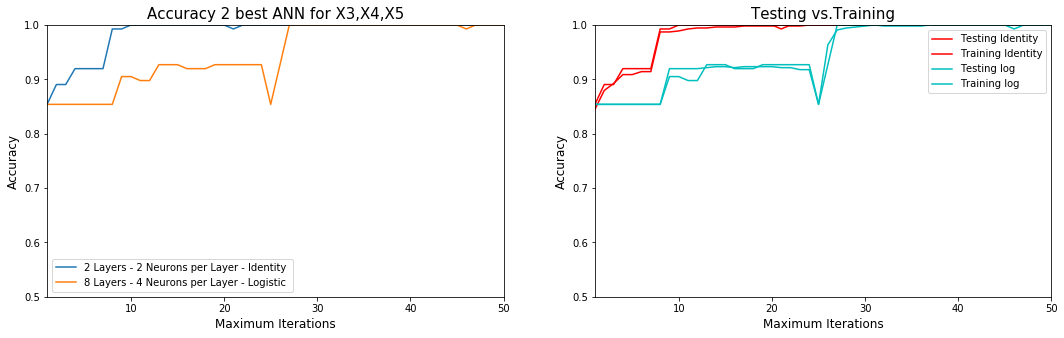

In [90]:
plt.figure(figsize=(18, 5))


plt.subplot(121)
#plt.figure(figsize=(8,6))
plt.plot(iter_log, acc,label='2 Layers - 2 Neurons per Layer - Identity ')
plt.plot(iter_log, acc_1,label='8 Layers - 4 Neurons per Layer - Logistic')
plt.xlabel("Maximum Iterations", size=12,)
plt.ylim(0.5,1)
plt.xlim(1,50)
plt.ylabel("Accuracy", size=12)
plt.legend()
plt.title("Accuracy 2 best ANN for X3,X4,X5" , size=15);


plt.subplot(122)
#plt.figure(figsize=(8,6))
plt.plot(iter_log, test,label='Testing Identity',c='r')
plt.plot(iter_log, train,label='Training Identity',c='r')

plt.plot(iter_log, test_1,label='Testing log',c='c')
plt.plot(iter_log, train_1,label='Training log',c='c')

plt.xlabel("Maximum Iterations", size=12,)
#plt.xticks(iter_opt,rotation=45)
plt.ylim(0.5,1)
plt.xlim(1,50)
plt.ylabel("Accuracy", size=12)
plt.legend()
plt.title("Testing vs.Training" , size=15);


The simplest ANN we can choose is the one with 2 Layers and 2 Neurons each - Using the easiest Activation = "Identity" 


###  clf = MLPClassifier(hidden_layer_sizes=(2, 2), activation='identity',max_iter=i, alpha=0.01,learning_rate='constant',solver='lbfgs', random_state=10,tol=0.000000001,early_stopping=True)



--------------------------------------------------------------------------


### And finally, lets build the neural network for the last exercise. 

4.{${X_1},{X_2},{X_3},{X_4},{X_5}$}

In [91]:

train=pd.concat(train_frames)
test=pd.concat(test_frames)


xall_train=train.drop(['Color'], axis=1)
xall_test=test.drop(['Color'], axis=1)

y_train = train['Color']
y_test = test['Color']

In [93]:

xall_train=scaler.fit_transform(xall_train)
xall_test=scaler.fit_transform(xall_test)


In [94]:

# Define layers and Neurons per layer - 
layers=[2,4,5,6,7,8,9,10]
neurons=[2,3,4,5,6]
hidden_layer_sizes=list(itertools.product(layers,neurons))
#diff activation
models=('identity', 'logistic', 'tanh', 'relu')
    
acc=[]
layer=[]
activation=[]
for h in hidden_layer_sizes:
    for a in models:
        clf = MLPClassifier(hidden_layer_sizes=h,activation=a ,max_iter=200, alpha=0.01,
                            learning_rate='constant',solver='lbfgs', random_state=21,tol=0.000000001)
        clf.fit(xall_train, y_train)
        y_pred = clf.predict(xall_test)
        acc.append(accuracy_score(y_test, y_pred))
        #loss_log.append(log_loss(y_test, y_pred))
        layer.append(h)
        activation.append(a)



In [ ]:
d={'Acuracy':acc,'Layers and Neurons per Layer':layer, 'Activation':activation}
history=pd.DataFrame(d)
history.sort_values('Acuracy',ascending=False).head()

In [97]:
acc=[]
train=[]
test=[]
iter_log=[]
for i in range(1,500,1):
    clf = MLPClassifier(hidden_layer_sizes=(2, 2), activation='identity',max_iter=i, alpha=0.01,
                        learning_rate='constant',solver='lbfgs', random_state=10,tol=0.000000001,early_stopping=True)
    xall_train,y_train = shuffle(xall_train,y_train,random_state=0)
    clf.fit(xall_train, y_train)
    y_pred = clf.predict(xall_test)
    acc.append(accuracy_score(y_test, y_pred))
    train.append(clf.score(xall_train, y_train))
    test.append(clf.score(xall_test, y_test))
    iter_log.append(i)
    
acc_1=[]
train_1=[]
test_1=[]


for i in range(1,500,1):
    clf = MLPClassifier(hidden_layer_sizes=(2, 2), activation='logistic',max_iter=i, alpha=0.01,
                        learning_rate='constant',solver='lbfgs', random_state=10,tol=0.000000001,early_stopping=True)
    xall_train,y_train = shuffle(xall_train,y_train,random_state=0)
    clf.fit(xall_train, y_train)
    y_pred = clf.predict(xall_test)
    acc_1.append(accuracy_score(y_test, y_pred))
    train_1.append(clf.score(xall_train, y_train))
    test_1.append(clf.score(xall_test, y_test))
    

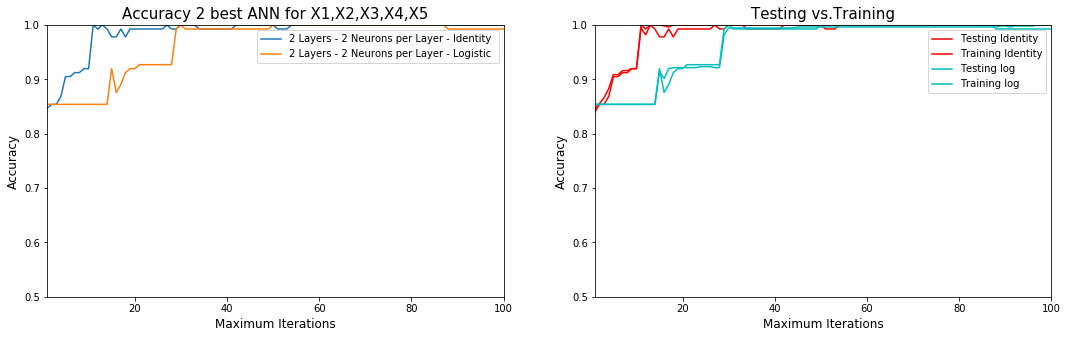

In [100]:
plt.figure(figsize=(18, 5))


plt.subplot(121)
#plt.figure(figsize=(8,6))
plt.plot(iter_log, acc,label='2 Layers - 2 Neurons per Layer - Identity ')
plt.plot(iter_log, acc_1,label='2 Layers - 2 Neurons per Layer - Logistic')
plt.xlabel("Maximum Iterations", size=12,)
plt.ylim(0.5,1)
plt.xlim(1,100)
plt.ylabel("Accuracy", size=12)
plt.legend()
plt.title("Accuracy 2 best ANN for X1,X2,X3,X4,X5" , size=15);


plt.subplot(122)
#plt.figure(figsize=(8,6))
plt.plot(iter_log, test,label='Testing Identity',c='r')
plt.plot(iter_log, train,label='Training Identity',c='r')

plt.plot(iter_log, test_1,label='Testing log',c='c')
plt.plot(iter_log, train_1,label='Training log',c='c')

plt.xlabel("Maximum Iterations", size=12,)
#plt.xticks(iter_opt,rotation=45)
plt.ylim(0.5,1)
plt.xlim(1,100)
plt.ylabel("Accuracy", size=12)
plt.legend()
plt.title("Testing vs.Training" , size=15);


The simplest ANN we can choose is the one with 2 Layers and 2 Neurons each - Using the easiest Activation = "Identity" 



###  clf = MLPClassifier(hidden_layer_sizes=(2, 2), activation='identity',max_iter=100, alpha=0.01,learning_rate='constant',solver='lbfgs', random_state=21,tol=0.000000001,early_stopping=True)



### Overfit Validation

Repeating the early stopping procedure many times may result in the model overfitting the validation dataset.
This can happen just as easily as overfitting the training dataset.

1. One approach is to only use early stopping once all other hyperparameters of the model have been chosen.
2. Another strategy may be to use a different split of the training dataset into train and validation sets each time early stopping is used.


In our project, i used the first approach, and only used early stopping after all other param have been tuned. 



### This conclude the Final project 

As Summary, I have trained all those 5 Neural Networks based on the required sets of inputs, evaluated performance and selected the most simple neural networks for each case after looping through different alternatives. Always remembering to ensure data integrity ( shuffling, spliting and normalizing ) in each case. 



Thank you !



Silvia